In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-stress-prediction/Stress.csv


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Read in data
data = pd.read_csv('/kaggle/input/human-stress-prediction/Stress.csv')

# Get the text data
text = data['text'];
label = data['label']

# Take a look at the data
text.head()

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object


#### **Checking Target blance**

In [4]:
label.value_counts()

1    1488
0    1350
Name: label, dtype: int64

# **EDA**

In [5]:
colors = ['gold', 'mediumturquoise']
labels = ['STRESS','NoStress']
values = data['label'].value_counts()/data['label'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [6]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
     
    return result

In [7]:
data['clean_text'] = data['text'].apply(preprocess)

In [8]:
data['clean_text_joined']=data['clean_text'].apply(lambda x:" ".join(x))

# **Lets Take a look at the Word Clouds for the stress condition**
### Word Cloud using the text whose target is 1


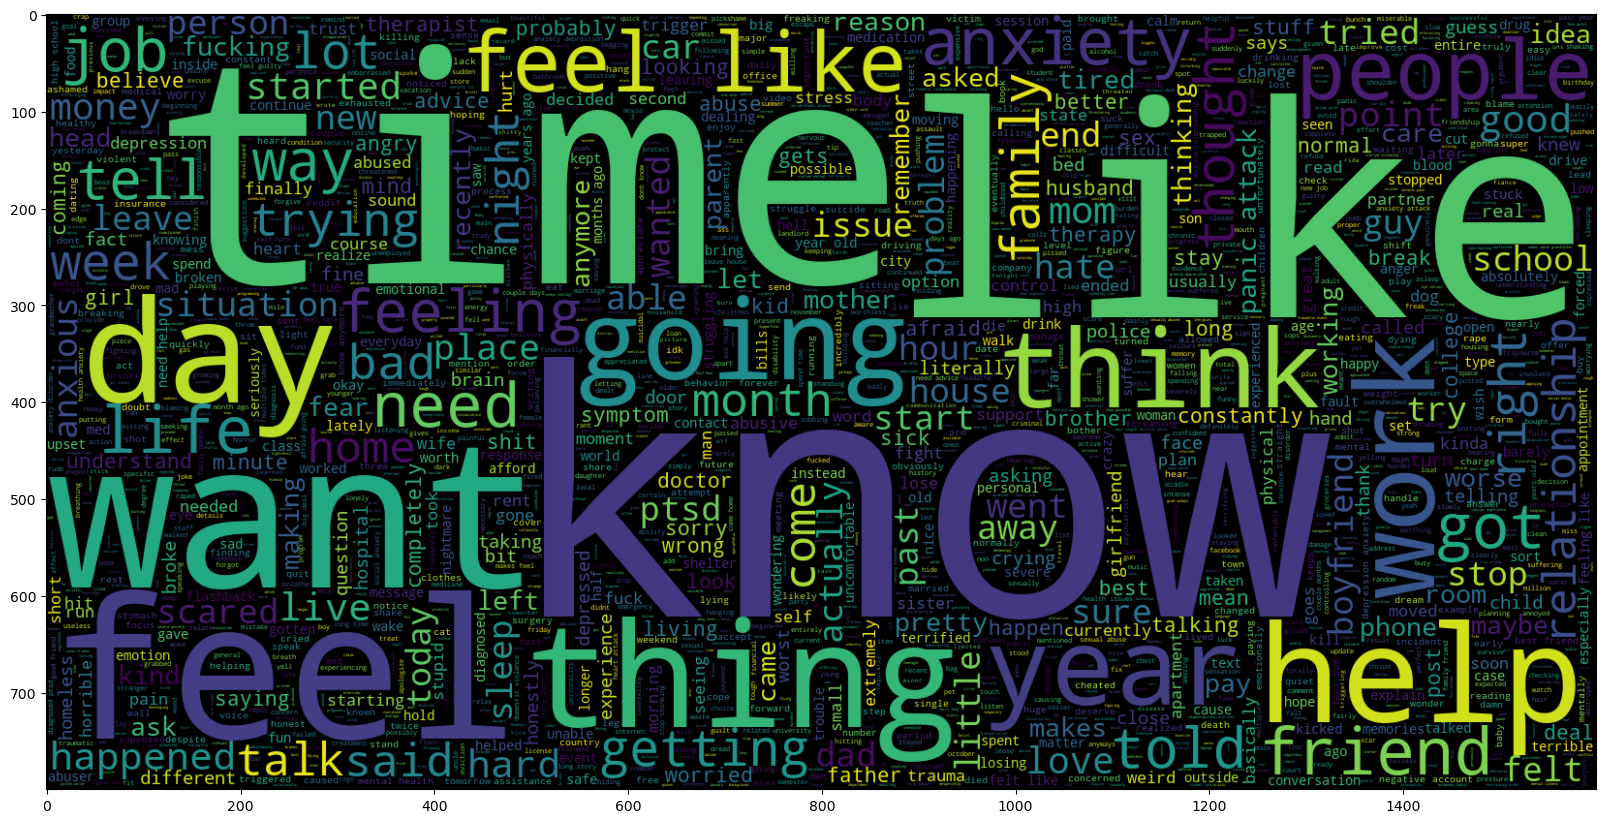

In [9]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(data[data.label == 1].clean_text_joined))
plt.imshow(wc, interpolation = 'bilinear')

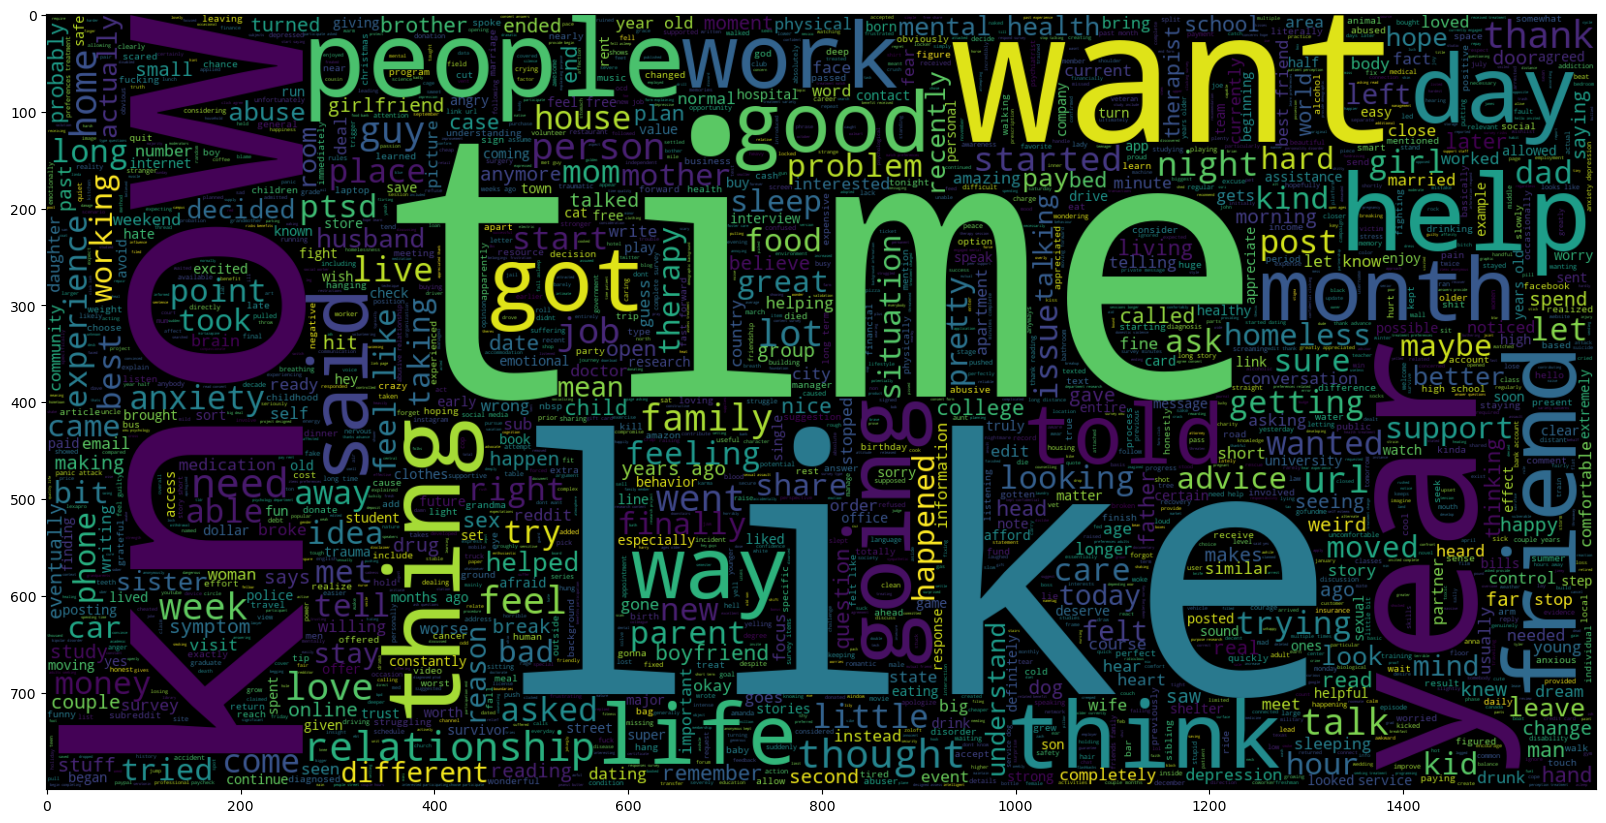

In [10]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(data[data.label == 0].clean_text_joined))
plt.imshow(wc, interpolation = 'bilinear')

### **Lets Look at the Count of Words Distribution in the Text of Stressed v/s non-stressed statements**

In [11]:
maxlen = -1
for doc in data.clean_text_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a text is =", maxlen)
fig = px.histogram(data , x = [len(x) for x in data.clean_text], nbins = 50,labels={'label':'Stress Condition'},
                  color=data.label)
fig.show()

The maximum number of words in a text is = 123


# **N-gram Analysis - Bigram and Trigram**

In [12]:
stressed_word=[]
for words in data[data.label == 1].clean_text:
    for token in words:
        stressed_word.append(token)
stressed_bigrams_series = (pd.Series(nltk.ngrams(stressed_word, 2)).value_counts())[:20]

Text(0.5, 0, '# of Occurances')

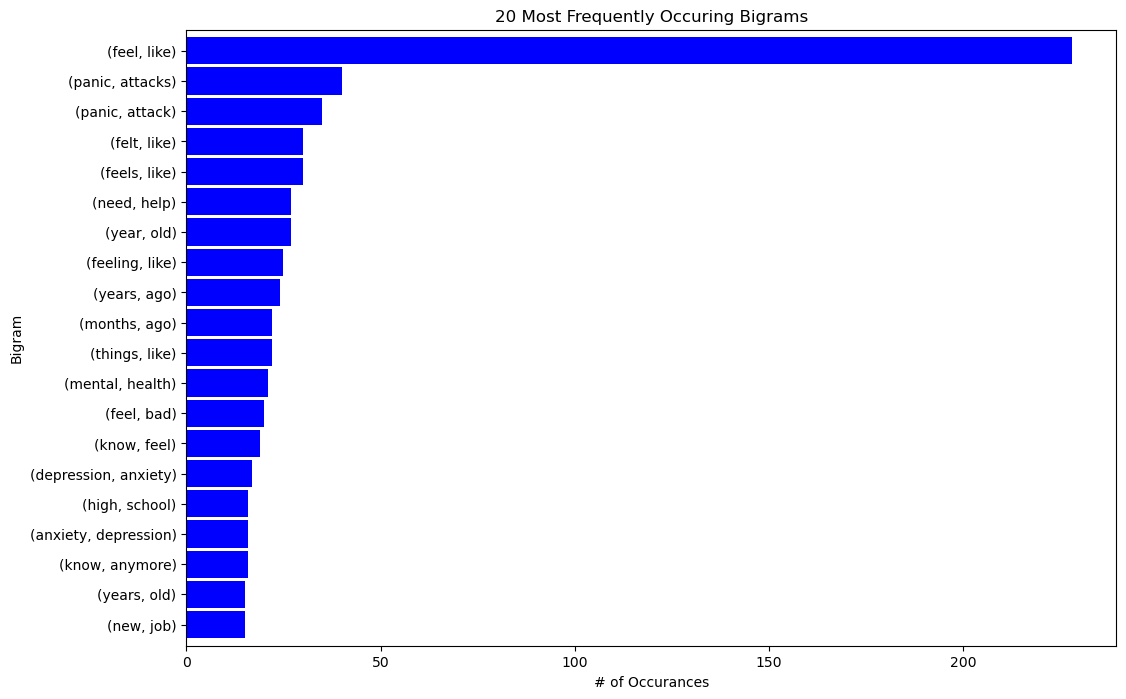

In [13]:
stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

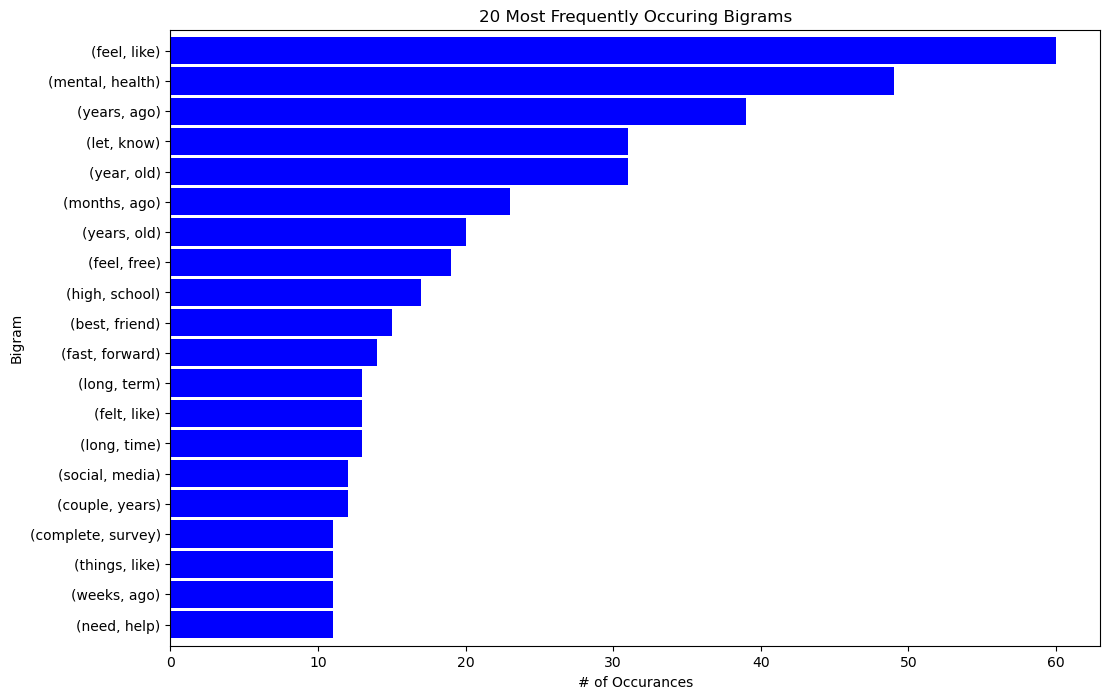

In [14]:
non_stressed_word=[]
for words in data[data.label == 0].clean_text:
    for token in words:
        non_stressed_word.append(token)
non_stressed_bigrams_series = (pd.Series(nltk.ngrams(non_stressed_word, 2)).value_counts())[:20]
non_stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')


Text(0.5, 0, '# of Occurances')

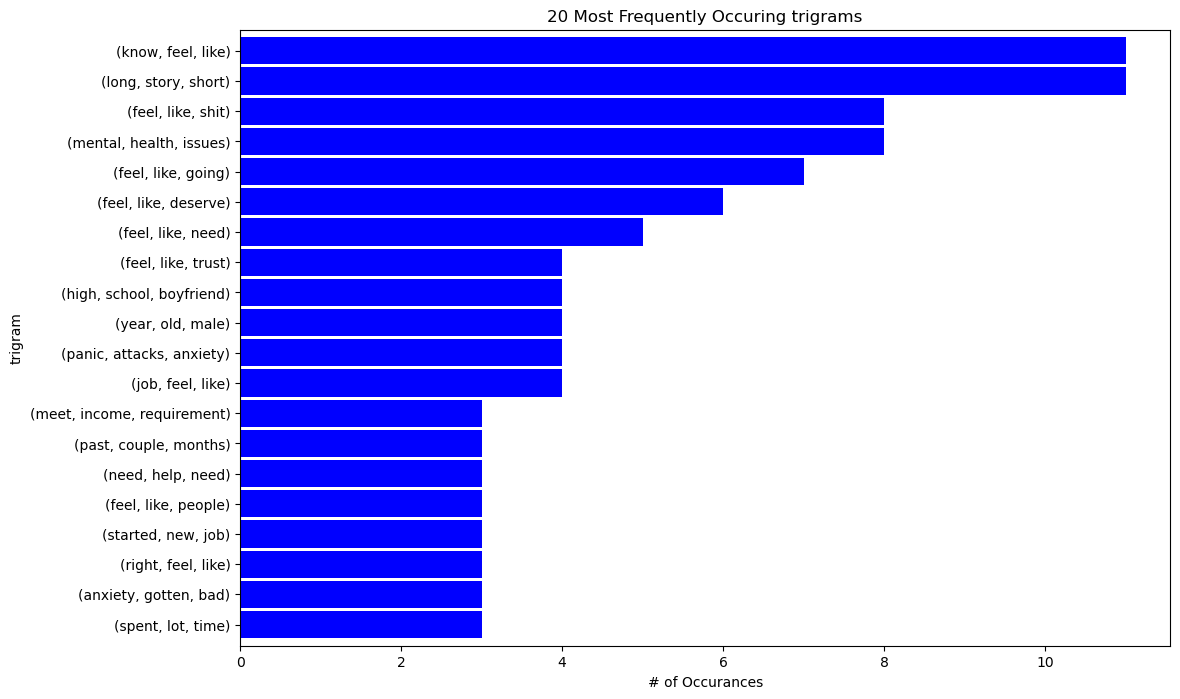

In [15]:
stressed_word=[]
for words in data[data.label == 1].clean_text:
    for token in words:
        stressed_word.append(token)
stressed_bigrams_series = (pd.Series(nltk.ngrams(stressed_word, 3)).value_counts())[:20]
stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring trigrams')
plt.ylabel('trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

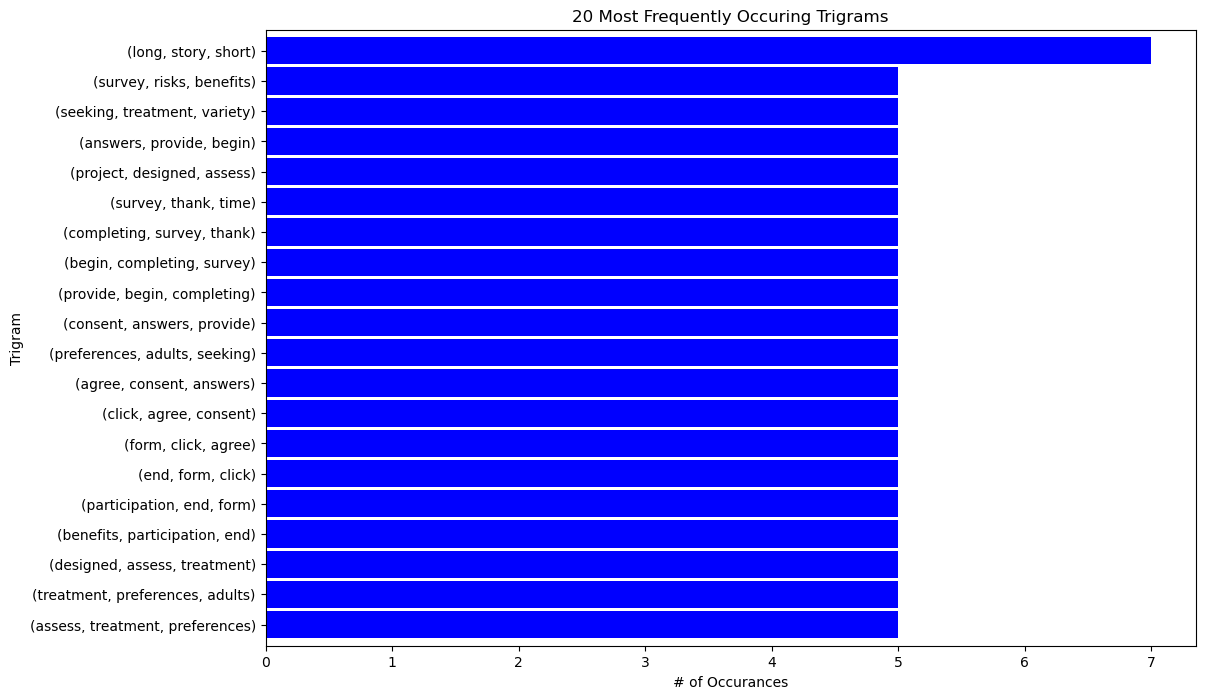

In [16]:
non_stressed_word=[]
for words in data[data.label == 0].clean_text:
    for token in words:
        non_stressed_word.append(token)
non_stressed_bigrams_series = (pd.Series(nltk.ngrams(non_stressed_word, 3)).value_counts())[:20]
non_stressed_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# **MODEL**

In [17]:
x_train,x_test,y_train,y_test = train_test_split(data.clean_text_joined, data.label, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(roc_auc_score(y_test, prediction)*100,2)))

accuracy: 76.22%


<AxesSubplot:>

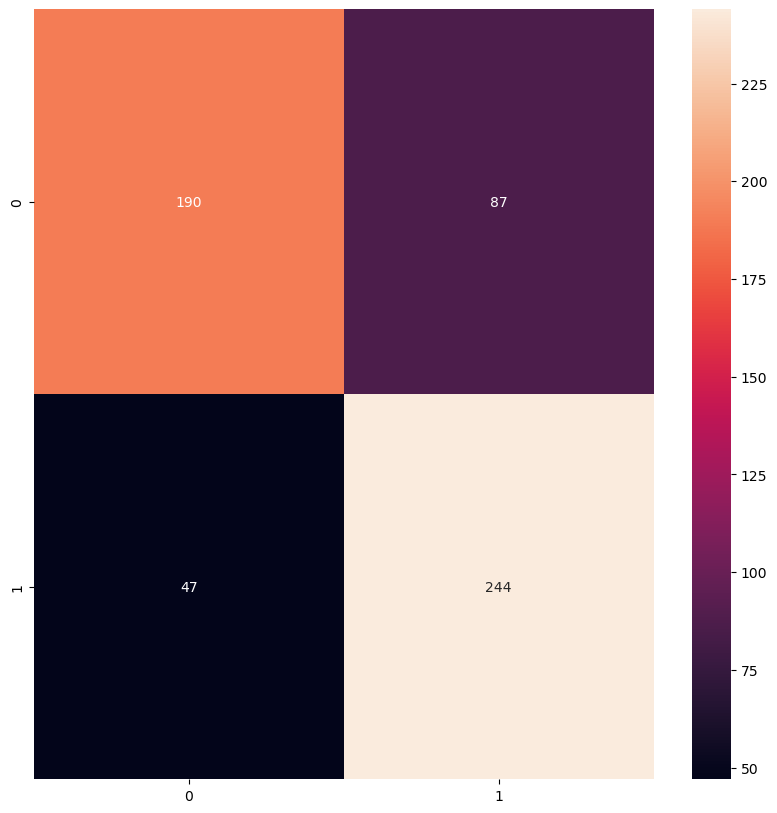

In [18]:
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')